# Загрузка датасета

In [19]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!unzip -o house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Импортируем нужные модули

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

import gc

sns.set()
%matplotlib inline

import sys

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 100  #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100)  # None)
plt.style.use('seaborn-v0_8-whitegrid')

# plt.rcParams["figure.figsize"] = (20, 15)

import warnings

warnings.filterwarnings('ignore')

# Описание данных

In [25]:
with open('data_description.txt') as dd:  # лежат в файле data_description.txt, удобнее мб смотреть туда
    print(dd.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [26]:
columns = ['Id',
           'MSSubClass',
           'MSZoning',
           'LotFrontage',
           'LotArea',
           'Street',
           'Alley',
           'LotShape',
           'LandContour',
           'Utilities',
           'LotConfig',
           'LandSlope',
           'Neighborhood',
           'Condition1',
           'Condition2',
           'BldgType',
           'HouseStyle',
           'OverallQual',
           'OverallCond',
           'YearBuilt',
           'YearRemodAdd',
           'RoofStyle',
           'RoofMatl',
           'Exterior1st',
           'Exterior2nd',
           'MasVnrType',
           'MasVnrArea',
           'ExterQual',
           'ExterCond',
           'Foundation',
           'BsmtQual',
           'BsmtCond',
           'BsmtExposure',
           'BsmtFinType1',
           'BsmtFinSF1',
           'BsmtFinType2',
           'BsmtFinSF2',
           'BsmtUnfSF',
           'TotalBsmtSF',
           'Heating',
           'HeatingQC',
           'CentralAir',
           'Electrical',
           '1stFlrSF',
           '2ndFlrSF',
           'LowQualFinSF',
           'GrLivArea',
           'BsmtFullBath',
           'BsmtHalfBath',
           'FullBath',
           'HalfBath',
           'BedroomAbvGr',
           'KitchenAbvGr',
           'KitchenQual',
           'TotRmsAbvGrd',
           'Functional',
           'Fireplaces',
           'FireplaceQu',
           'GarageType',
           'GarageYrBlt',
           'GarageFinish',
           'GarageCars',
           'GarageArea',
           'GarageQual',
           'GarageCond',
           'PavedDrive',
           'WoodDeckSF',
           'OpenPorchSF',
           'EnclosedPorch',
           '3SsnPorch',
           'ScreenPorch',
           'PoolArea',
           'PoolQC',
           'Fence',
           'MiscFeature',
           'MiscVal',
           'MoSold',
           'YrSold',
           'SaleType',
           'SaleCondition',
           'SalePrice']

df = pd.read_csv('./train.csv', names=columns, na_values="?")
test_df = pd.read_csv('./test.csv', names=columns, na_values="?")

In [27]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,1457,20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,1458,70,RL,66,9042,Pave,NaN,Reg

In [30]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NaN
1,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
2,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
3,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
4,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2915,160,RM,21,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Gd,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1456,2916,160,RM,21,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0,TA,TA,CBlock,TA,TA,No,Rec,252,Unf,0,294,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970,Unf,1,286,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1457,2917,20,RL,160,20000,Pave,NaN,Reg,Lv

In [31]:
df.info()  # информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1461 non-null   object
 1   MSSubClass     1461 non-null   object
 2   MSZoning       1461 non-null   object
 3   LotFrontage    1202 non-null   object
 4   LotArea        1461 non-null   object
 5   Street         1461 non-null   object
 6   Alley          92 non-null     object
 7   LotShape       1461 non-null   object
 8   LandContour    1461 non-null   object
 9   Utilities      1461 non-null   object
 10  LotConfig      1461 non-null   object
 11  LandSlope      1461 non-null   object
 12  Neighborhood   1461 non-null   object
 13  Condition1     1461 non-null   object
 14  Condition2     1461 non-null   object
 15  BldgType       1461 non-null   object
 16  HouseStyle     1461 non-null   object
 17  OverallQual    1461 non-null   object
 18  OverallCond    1461 non-null

In [33]:
df.shape  # размерность

(1461, 81)

In [34]:
df.dtypes

Id               object
MSSubClass       object
MSZoning         object
LotFrontage      object
LotArea          object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
YearBuilt        object
YearRemodAdd     object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1       object
BsmtFinType2     object
BsmtFinSF2       object
BsmtUnfSF        object
TotalBsmtSF      object
Heating          object
HeatingQC        object
CentralAir      

In [35]:
df.describe()  # описательная статистика только для столбцов с числовым значением

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1461,1461,1461,1202,1461,1461,92,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,589,1453,1461,1461,1461,1424,1424,1423,1424,1461,1423,1461,1461,1461,1461,1461,1461,1460,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,771,1380,1380,1380,1461,1461,1380,1380,1461,1461,1461,1461,1461,1461,1461,8,282,55,1461,1461,1461,1461,1461,1461
unique,1461,16,6,111,1074,3,3,5,5,3,6,4,26,10,9,6,9,11,10,113,62,7,9,16,17,4,328,5,6,7,5,5,5,7,638,7,145,781,722,7,6,3,6,754,418,25,862,5,4,5,4,9,5,5,13,8,5,6,7,98,4,6,442,6,6,4,275,203,121,21,77,9,4,5,5,22,13,6,10,7,664
top,Id,20,RL,60,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,BrkFace,0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Gd,Attchd,2005,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,140000
freq,1,536,1151,143,25,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,67,178,1141,1434,515,504,445,861,906,1282,647,649,1311,953,430,467,1256,1293,118,37,1428,741,1365,1334,25,829,1434,22,856,1378,768,913,804,1392,735,402,1360,690,380,870,65,605,824,81,1311,1326,1340,761,656,1252,1436,1344,1453,3,157,49,1408,253,338,1267,1198,20


In [36]:
df.describe(include=['object'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1461,1461,1461,1202,1461,1461,92,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,589,1453,1461,1461,1461,1424,1424,1423,1424,1461,1423,1461,1461,1461,1461,1461,1461,1460,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,771,1380,1380,1380,1461,1461,1380,1380,1461,1461,1461,1461,1461,1461,1461,8,282,55,1461,1461,1461,1461,1461,1461
unique,1461,16,6,111,1074,3,3,5,5,3,6,4,26,10,9,6,9,11,10,113,62,7,9,16,17,4,328,5,6,7,5,5,5,7,638,7,145,781,722,7,6,3,6,754,418,25,862,5,4,5,4,9,5,5,13,8,5,6,7,98,4,6,442,6,6,4,275,203,121,21,77,9,4,5,5,22,13,6,10,7,664
top,Id,20,RL,60,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,BrkFace,0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Gd,Attchd,2005,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,140000
freq,1,536,1151,143,25,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,67,178,1141,1434,515,504,445,861,906,1282,647,649,1311,953,430,467,1256,1293,118,37,1428,741,1365,1334,25,829,1434,22,856,1378,768,913,804,1392,735,402,1360,690,380,870,65,605,824,81,1311,1326,1340,761,656,1252,1436,1344,1453,3,157,49,1408,253,338,1267,1198,20


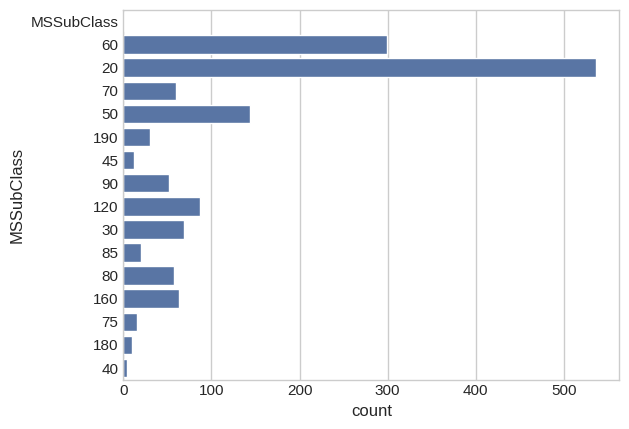

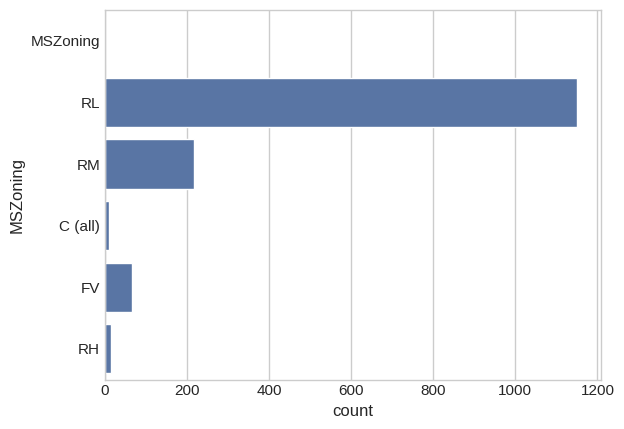

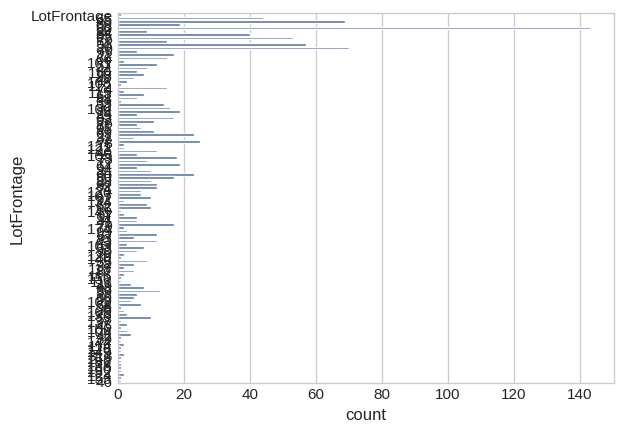

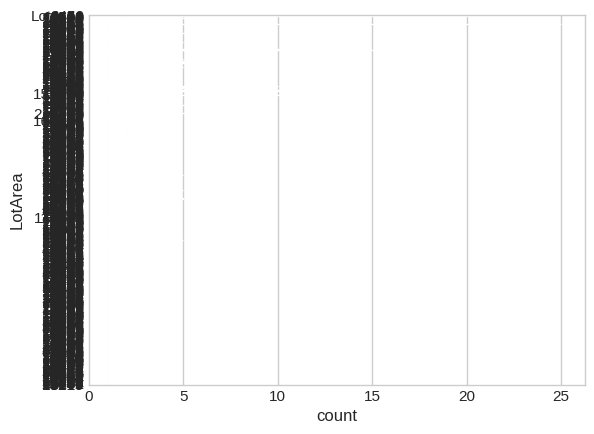

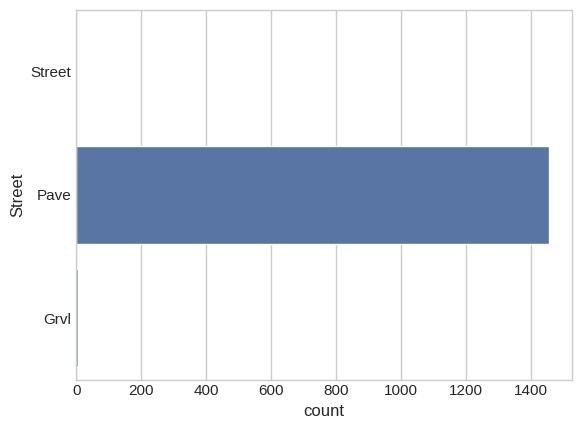

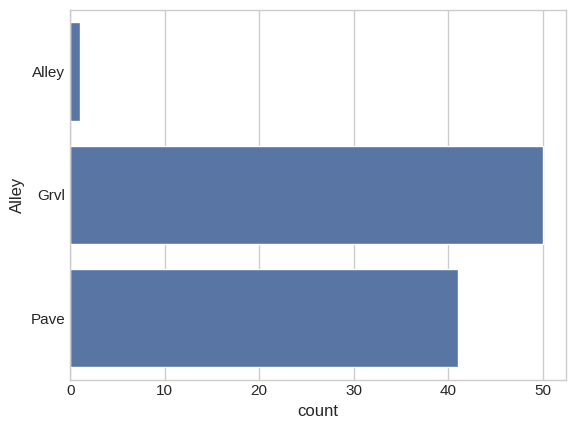

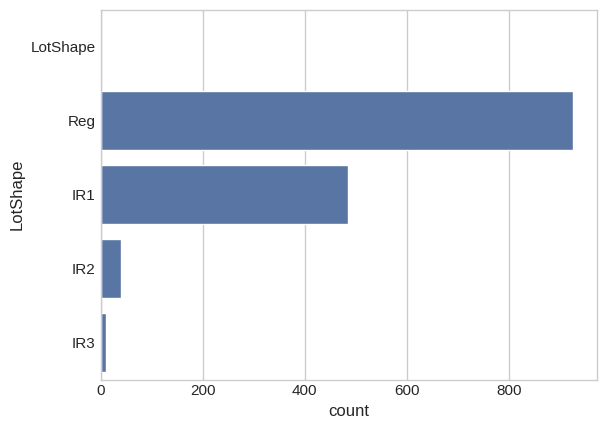

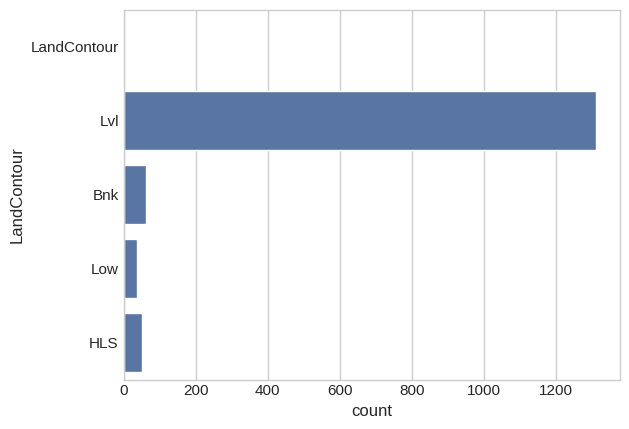

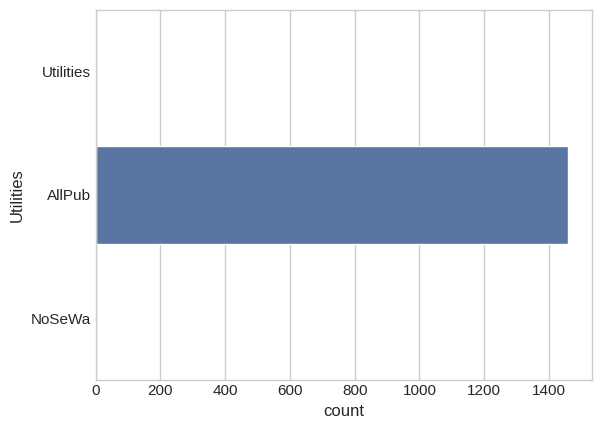

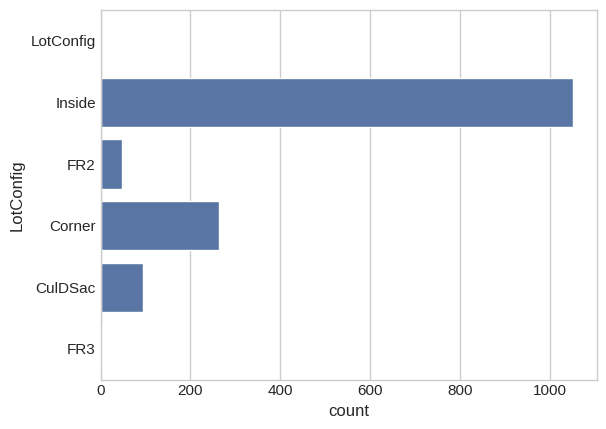

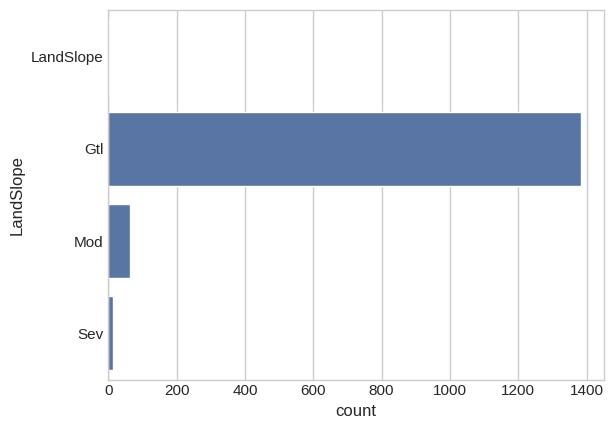

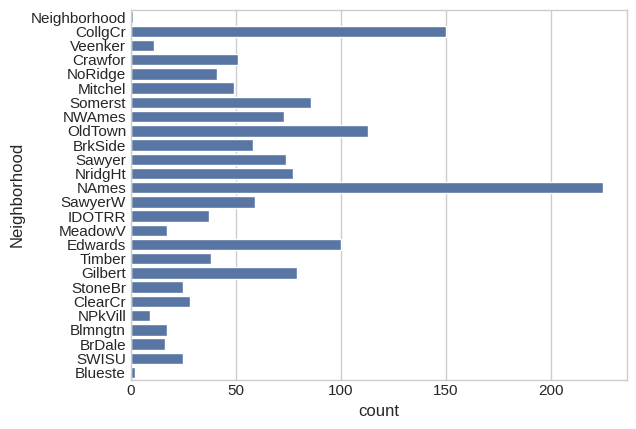

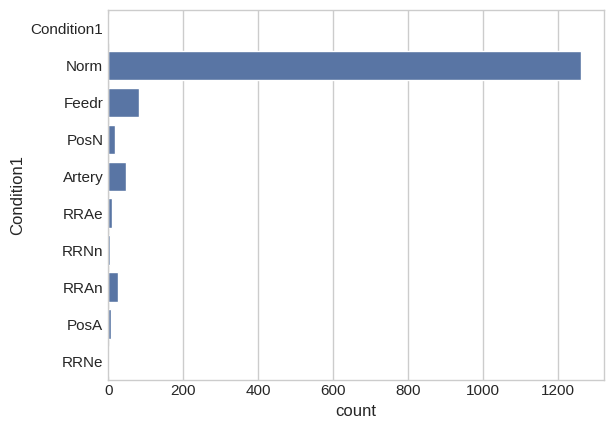

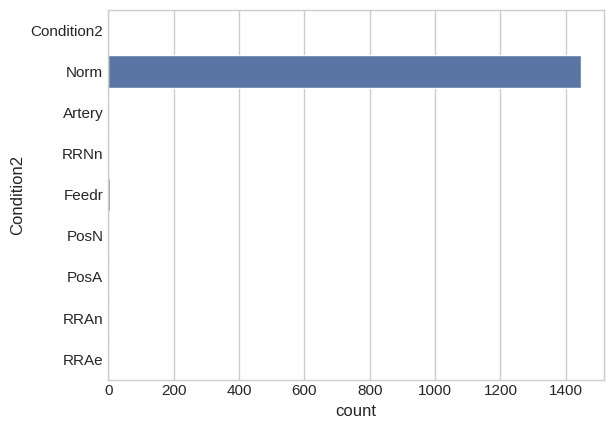

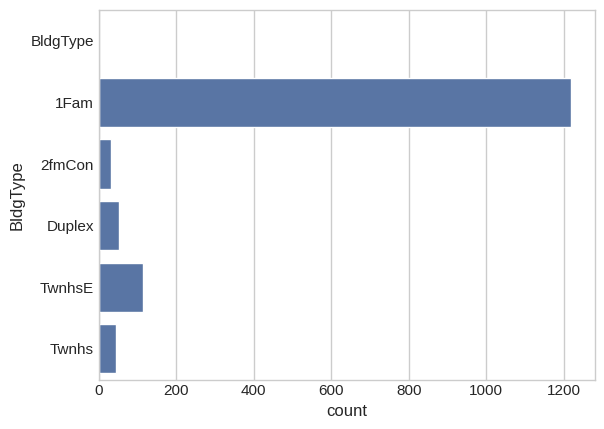

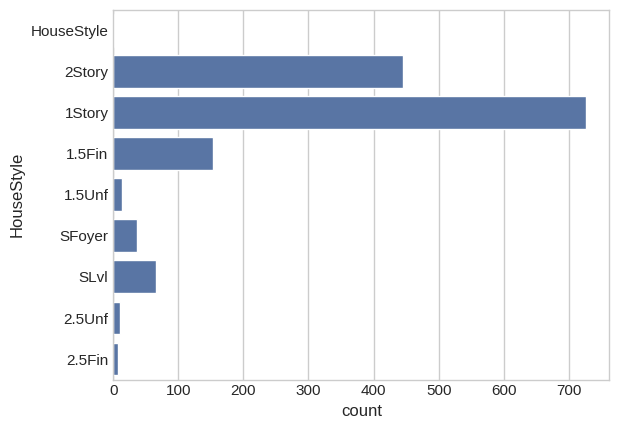

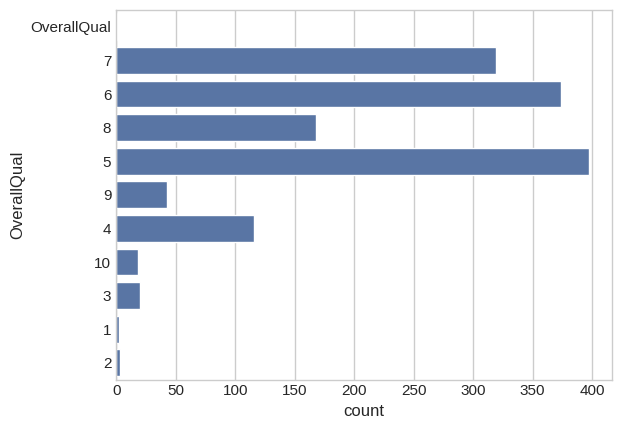

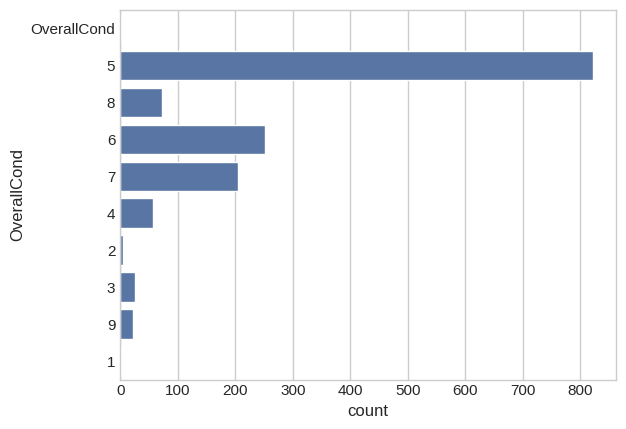

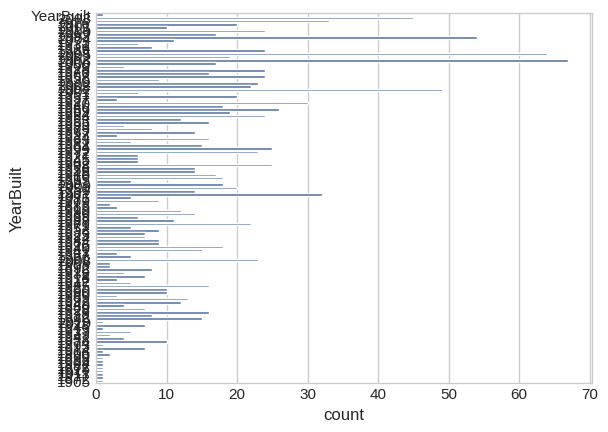

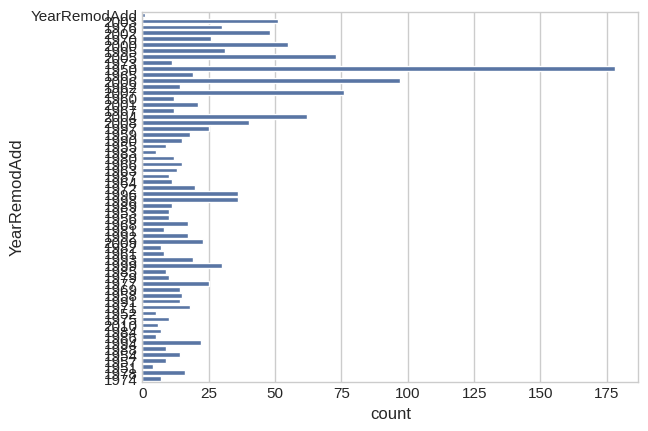

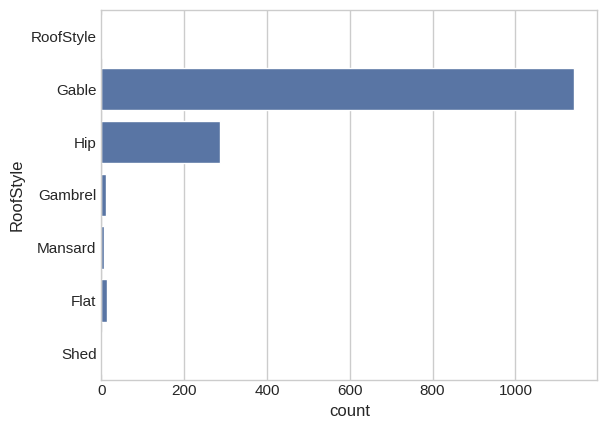

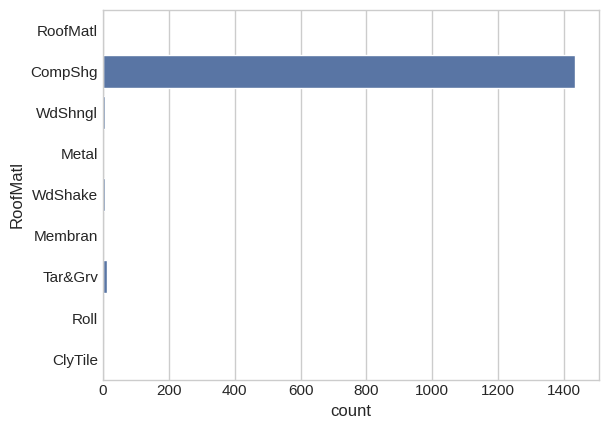

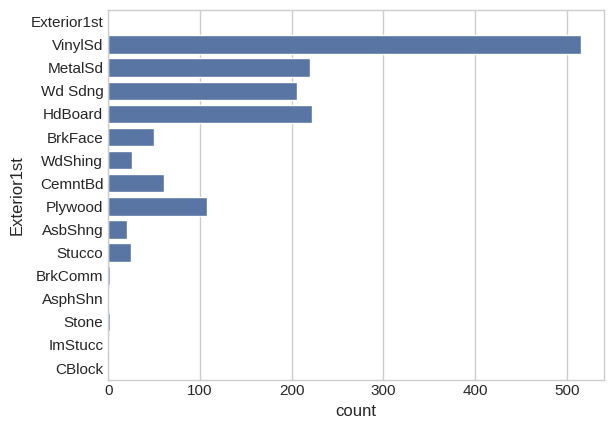

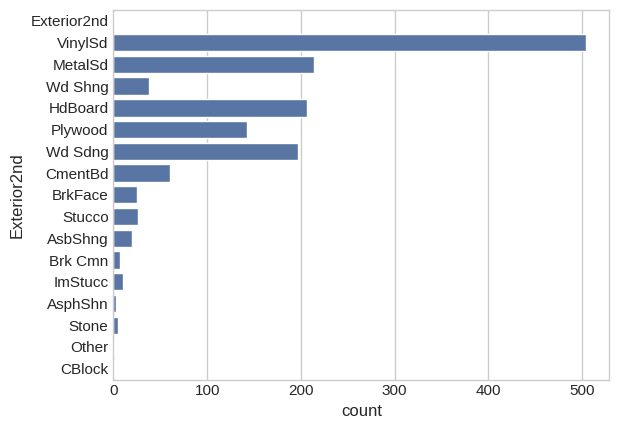

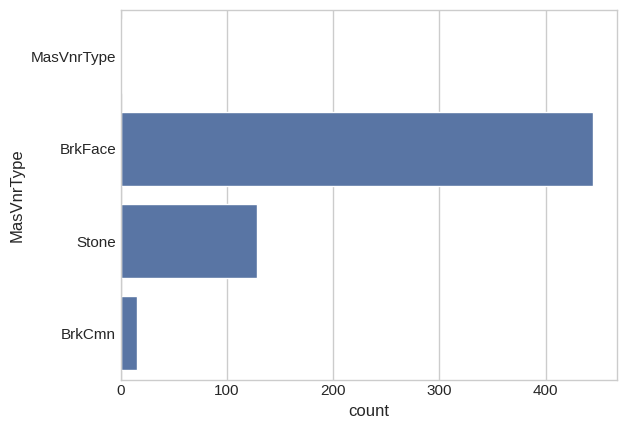

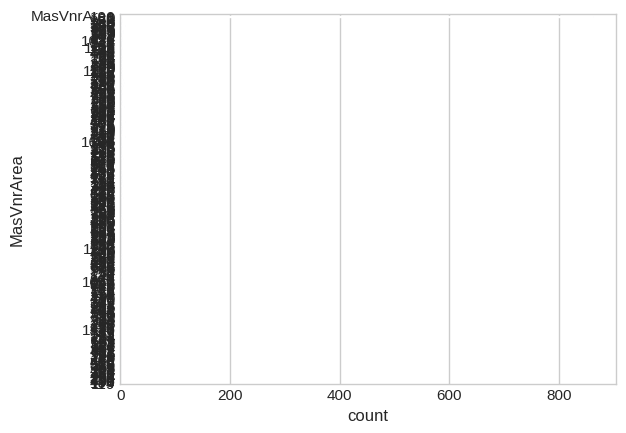

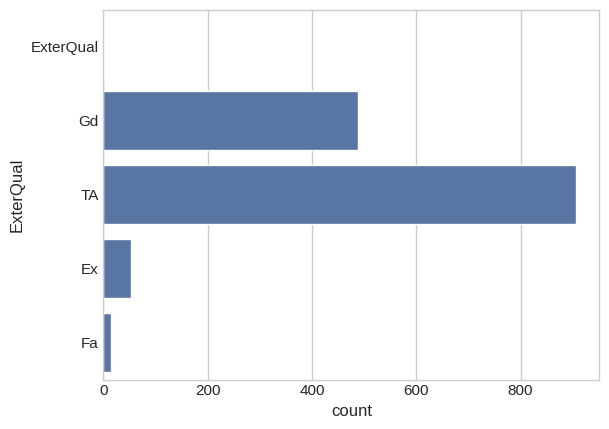

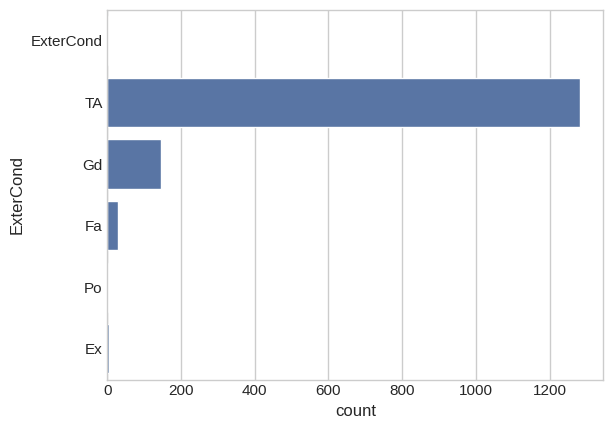

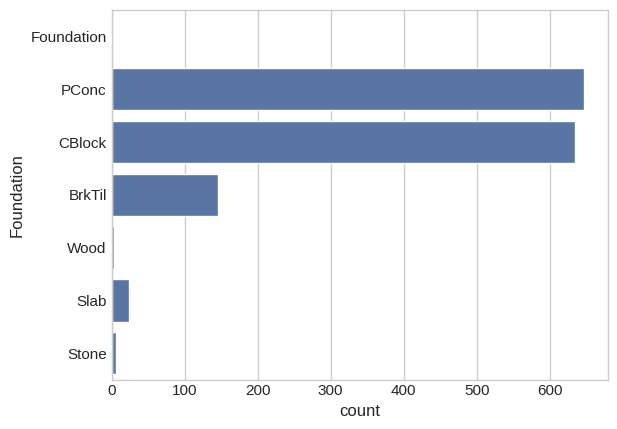

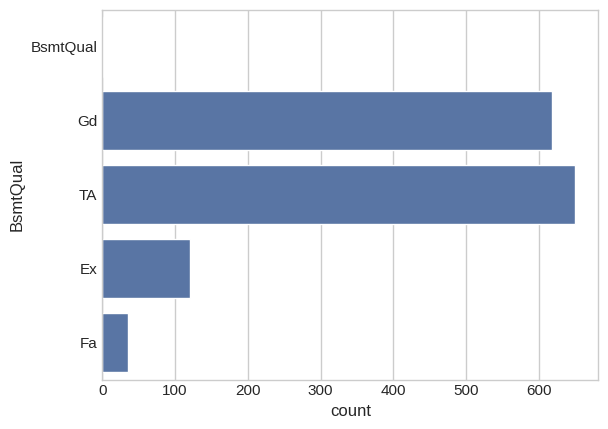

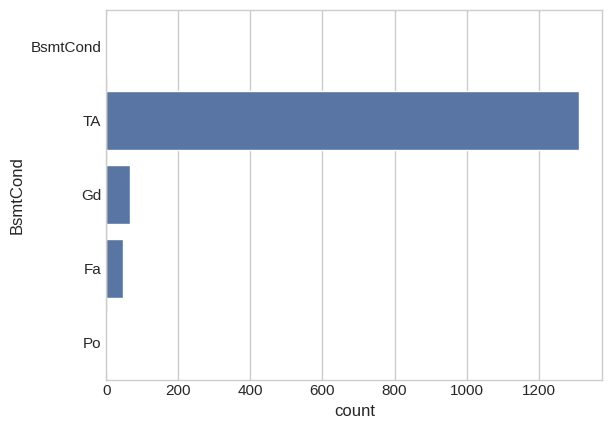

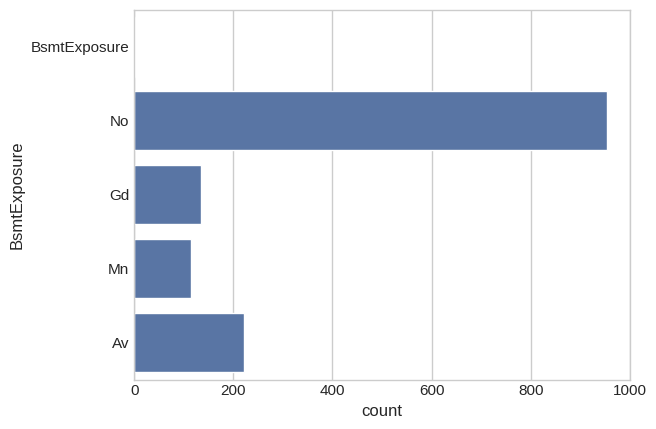

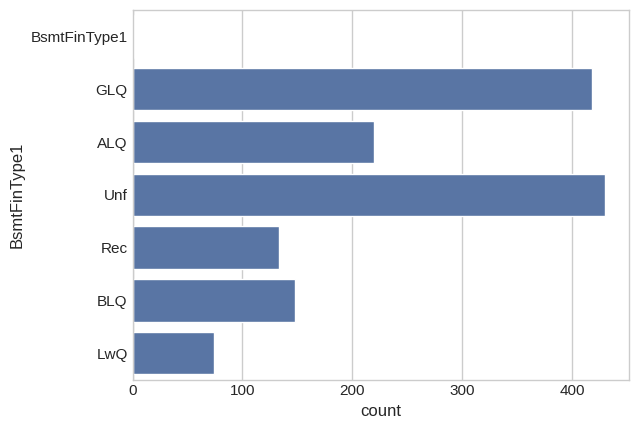

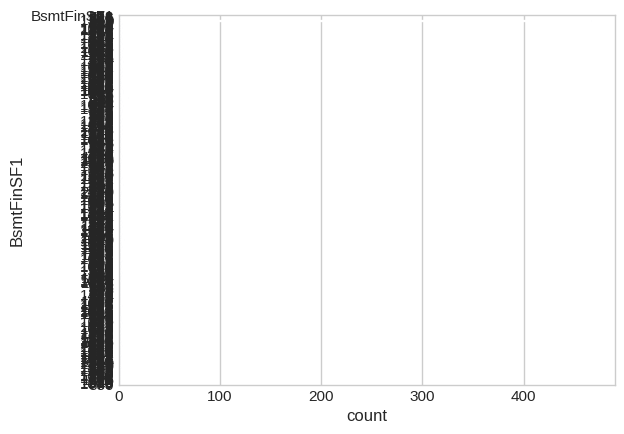

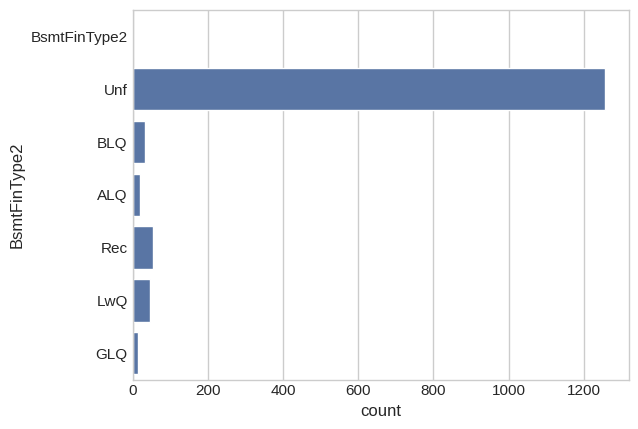

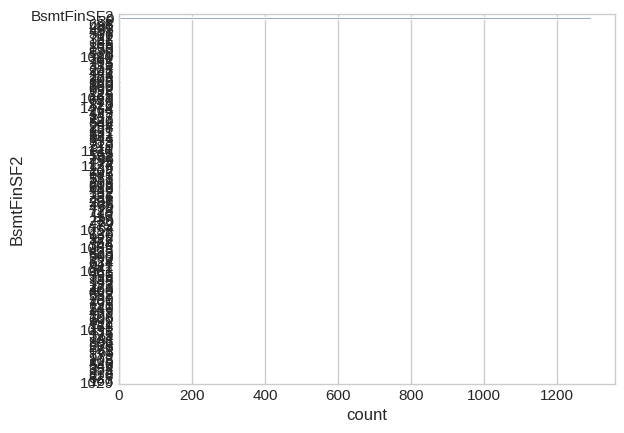

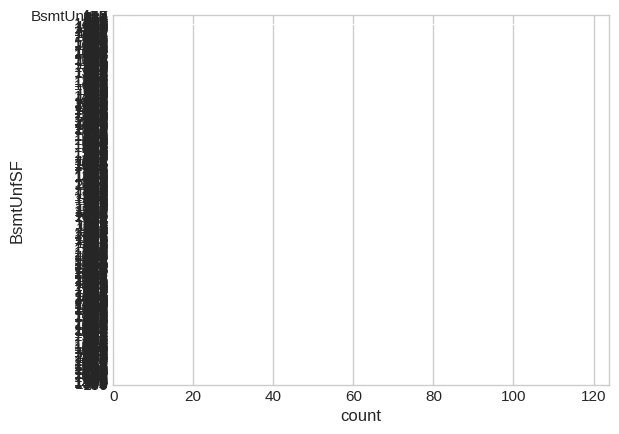

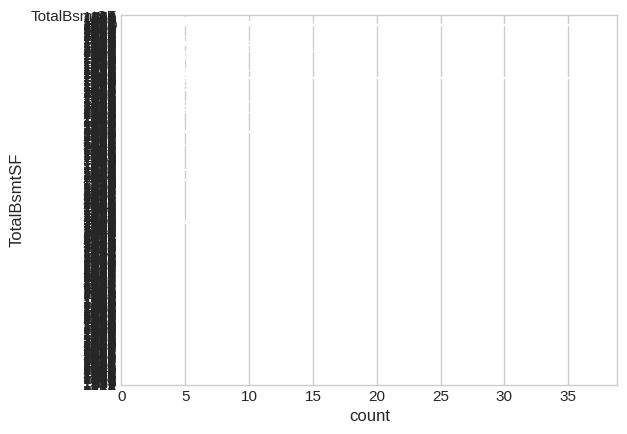

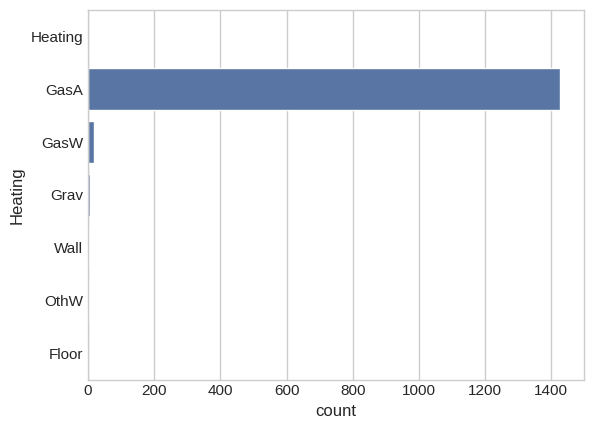

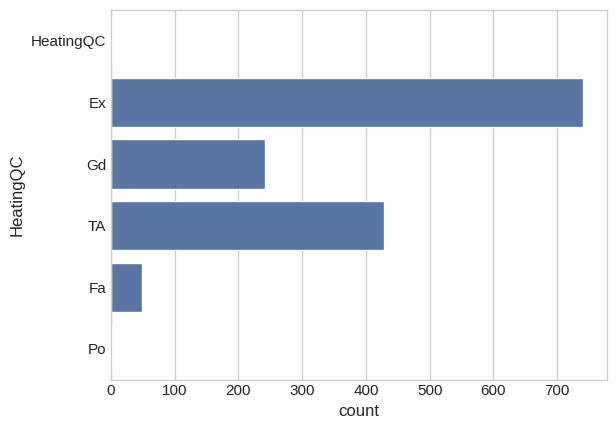

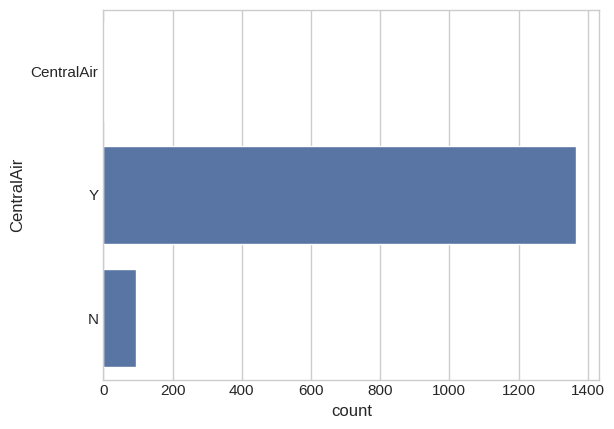

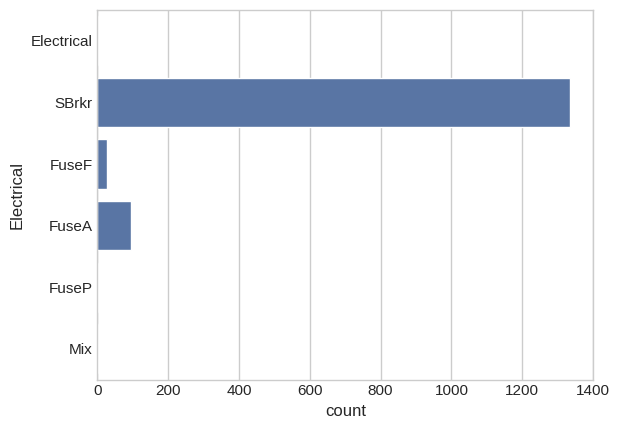

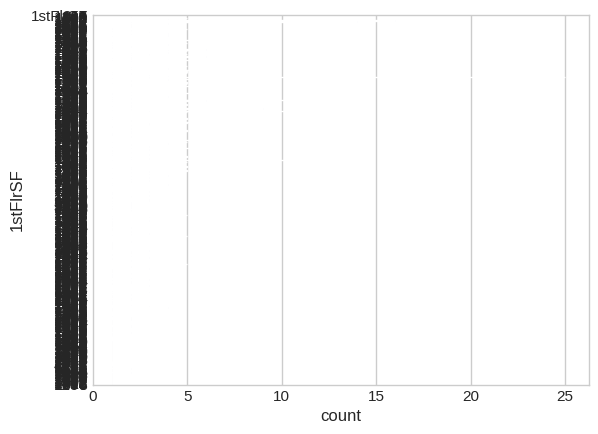

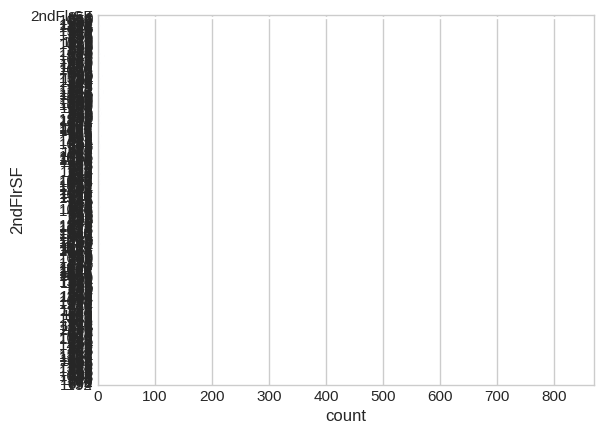

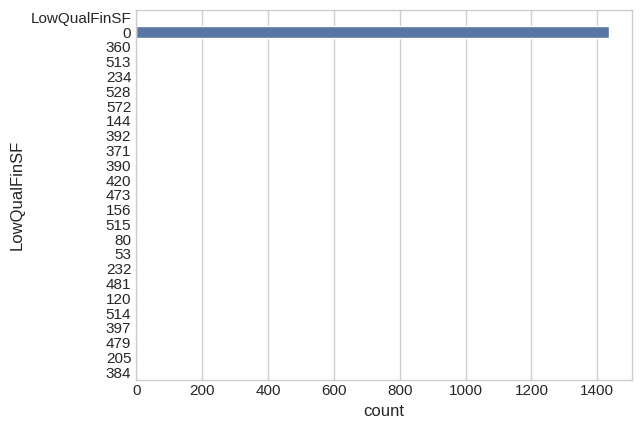

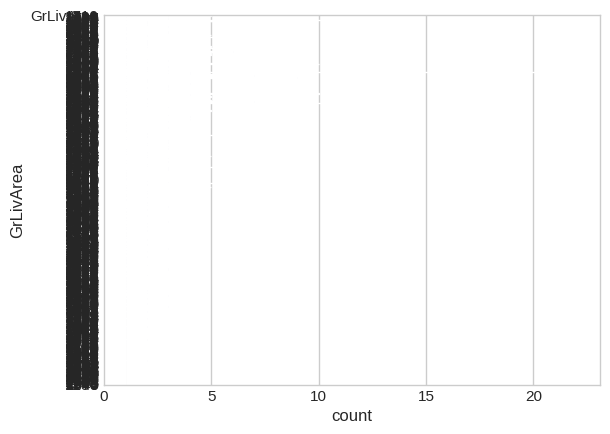

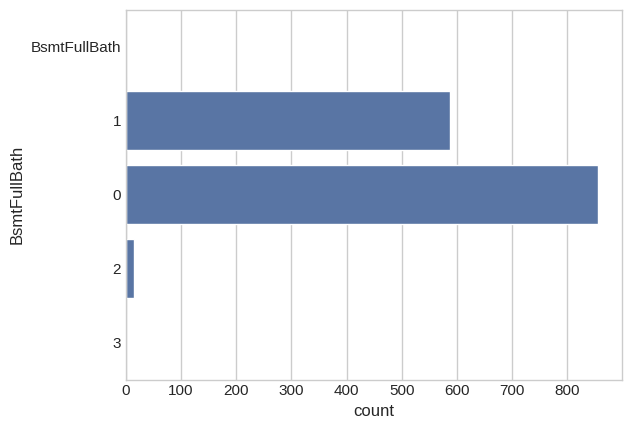

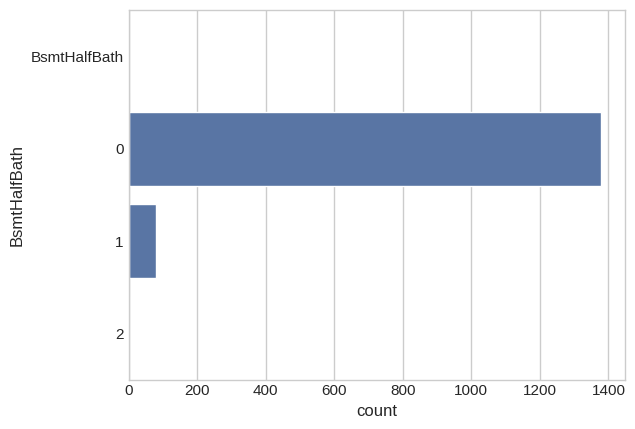

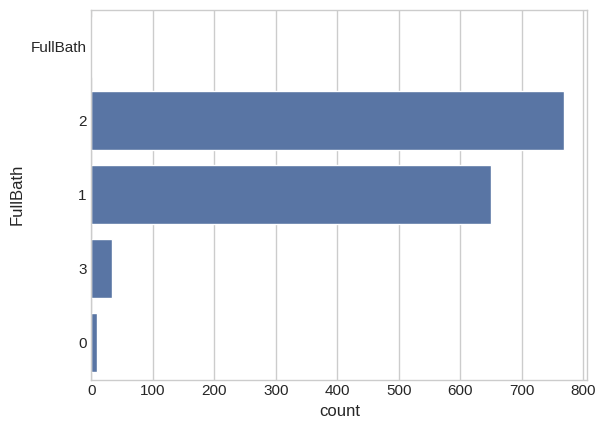

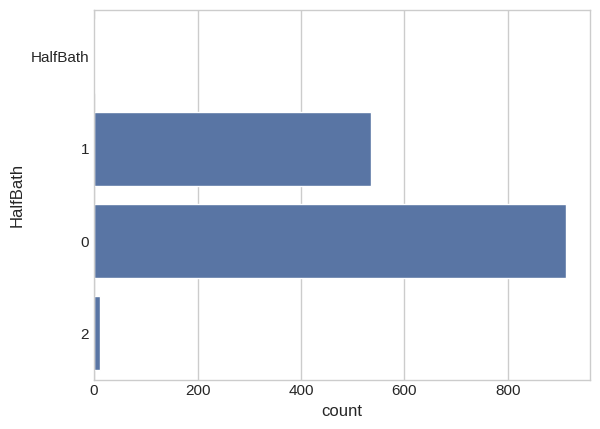

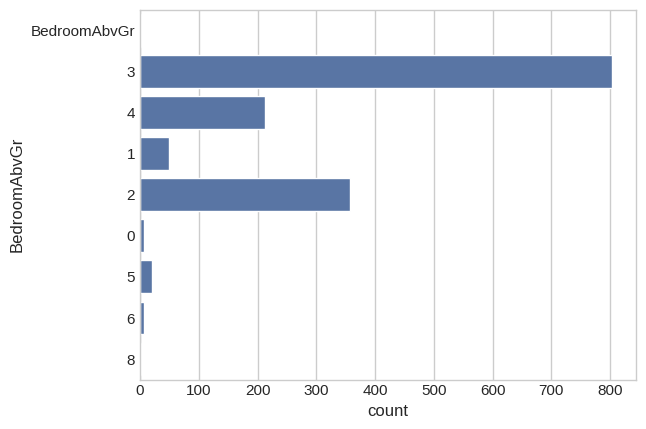

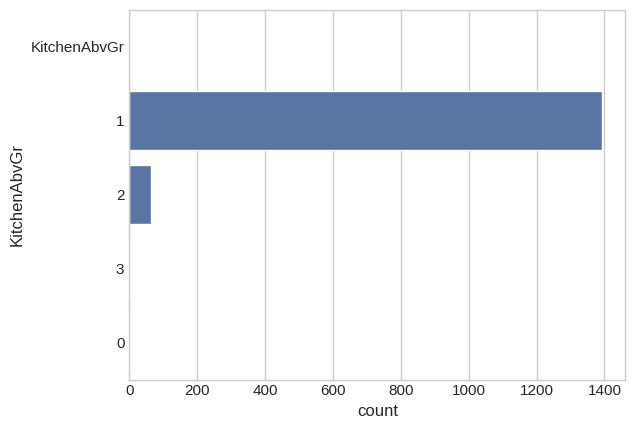

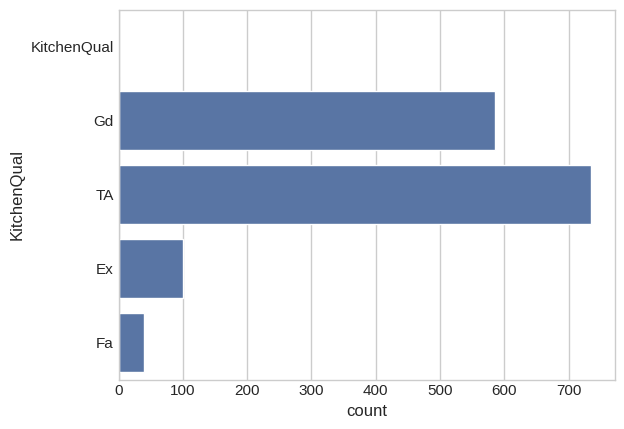

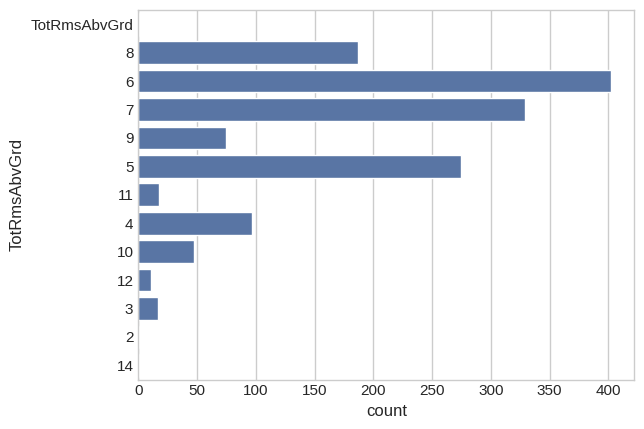

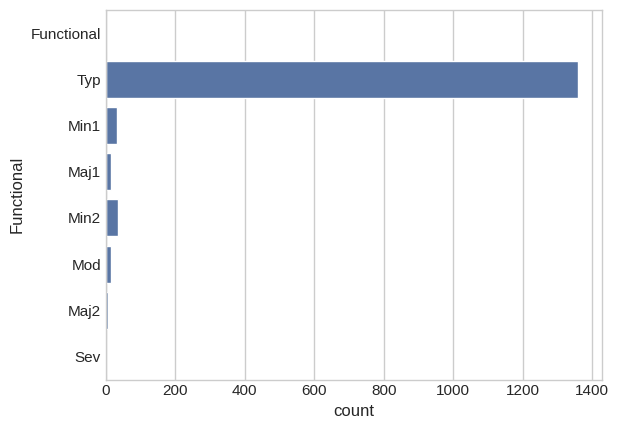

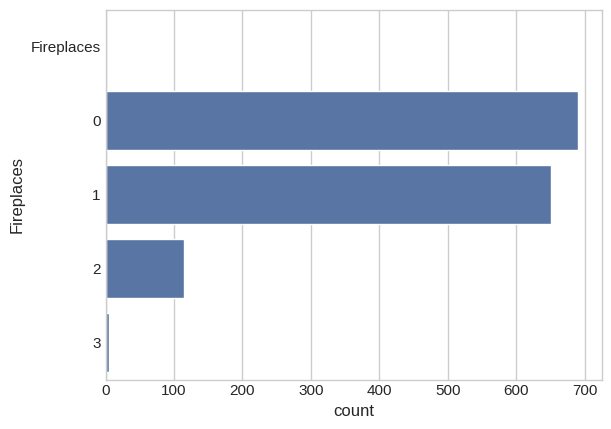

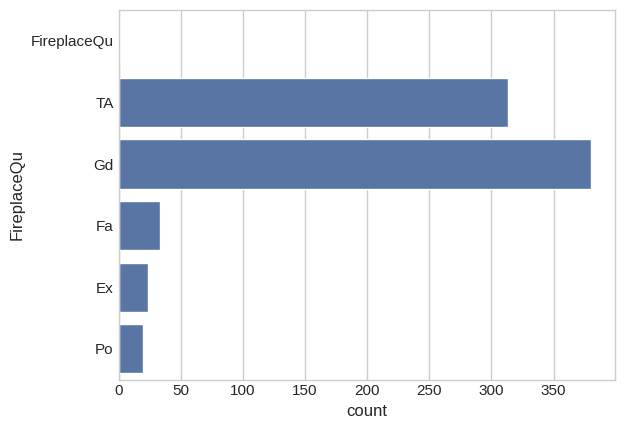

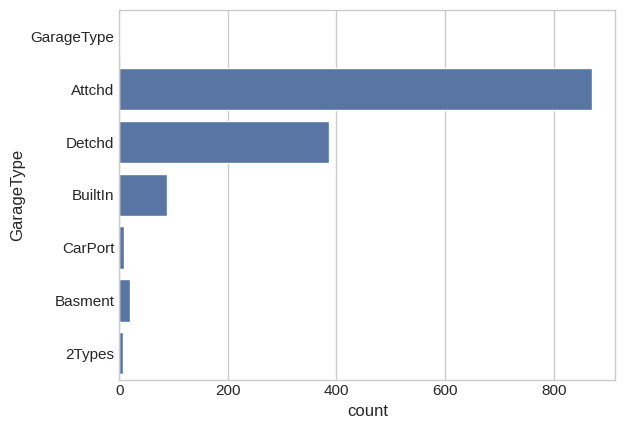

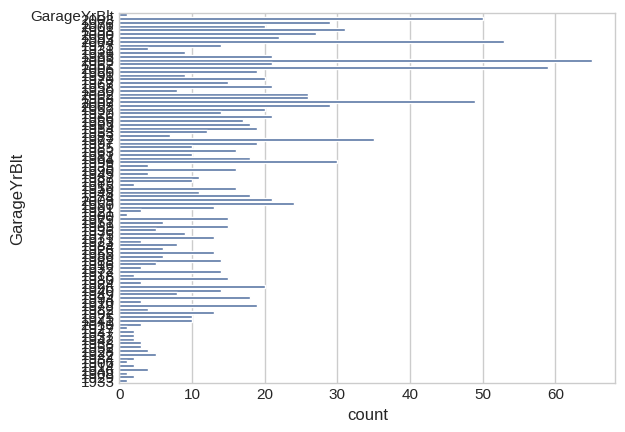

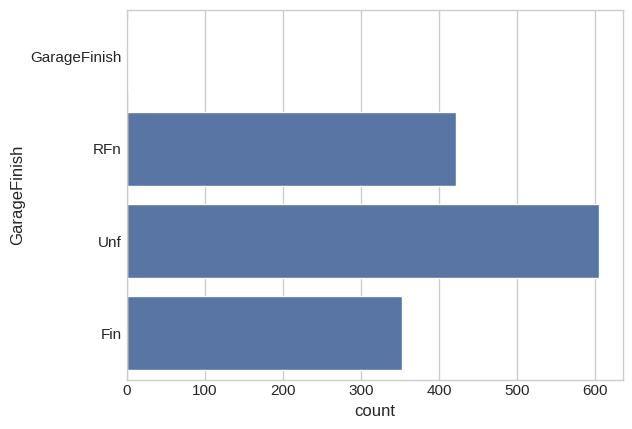

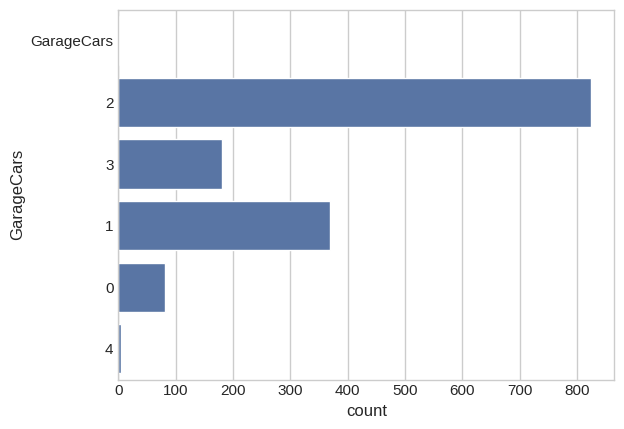

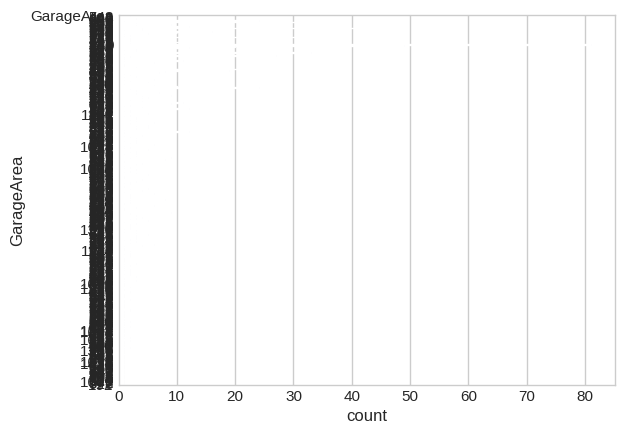

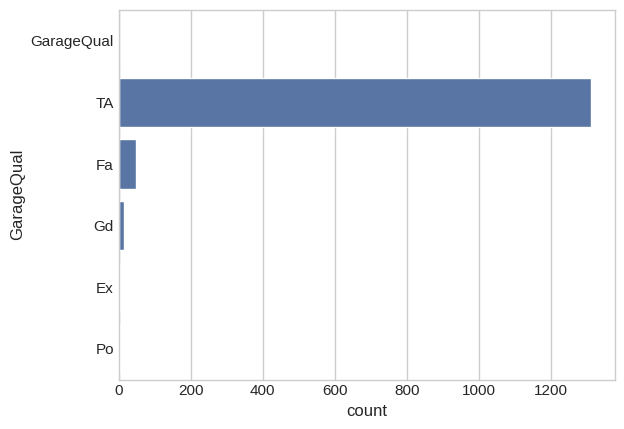

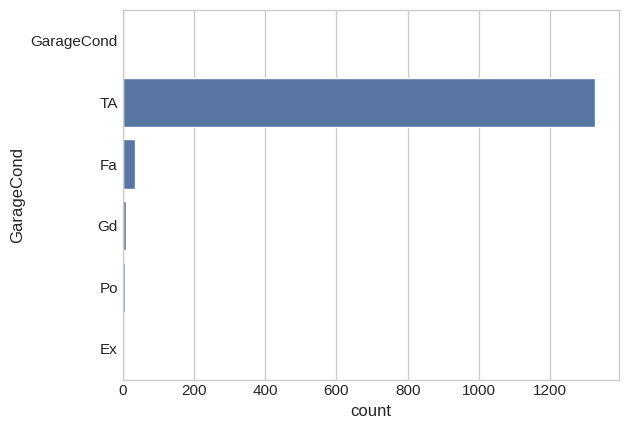

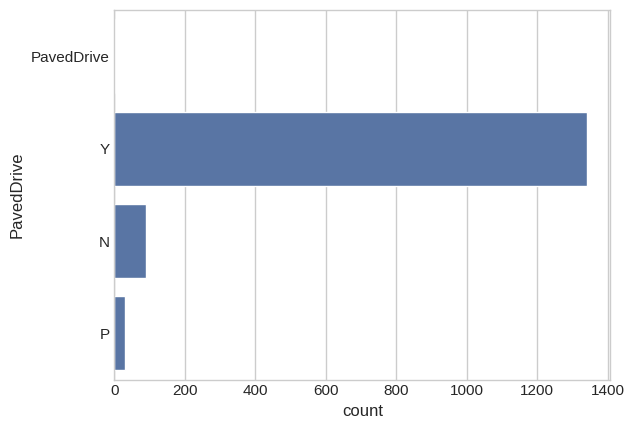

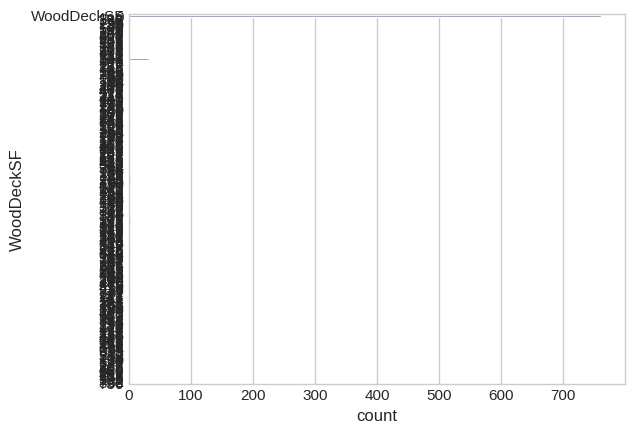

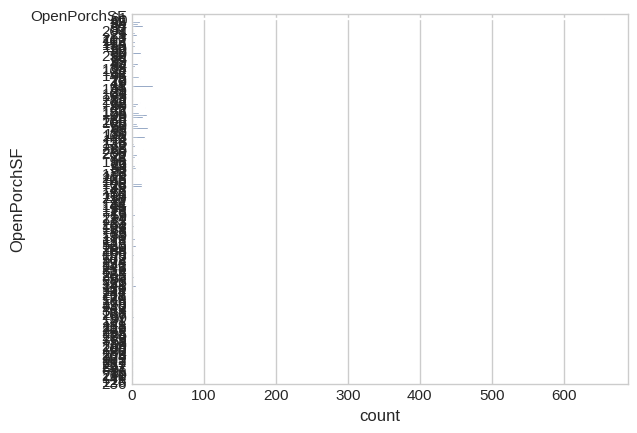

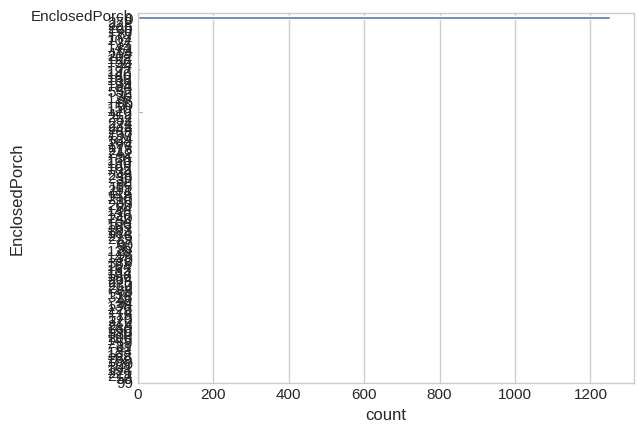

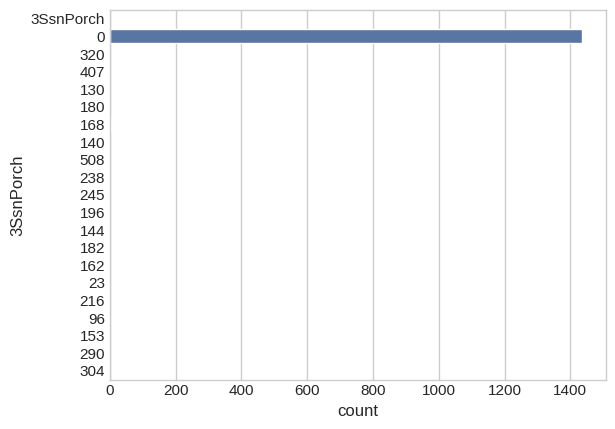

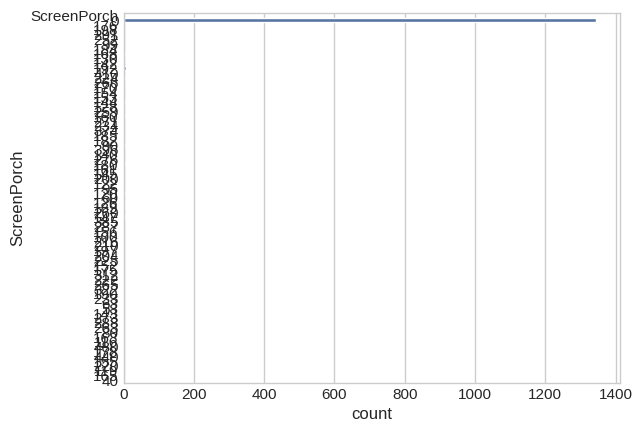

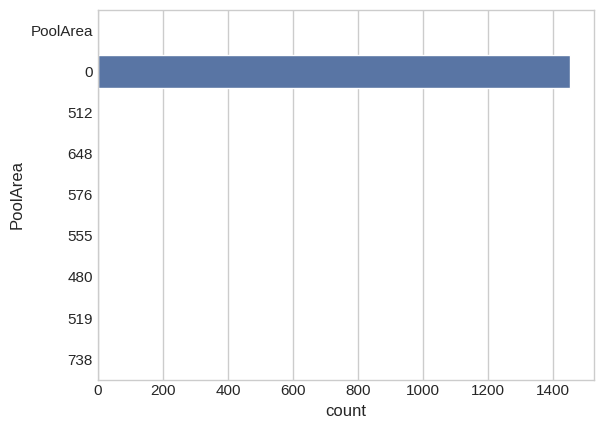

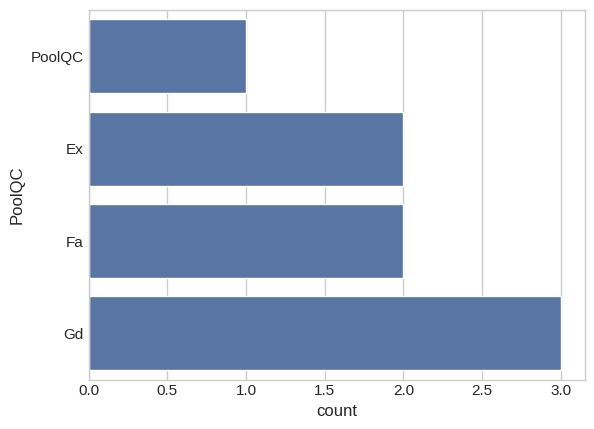

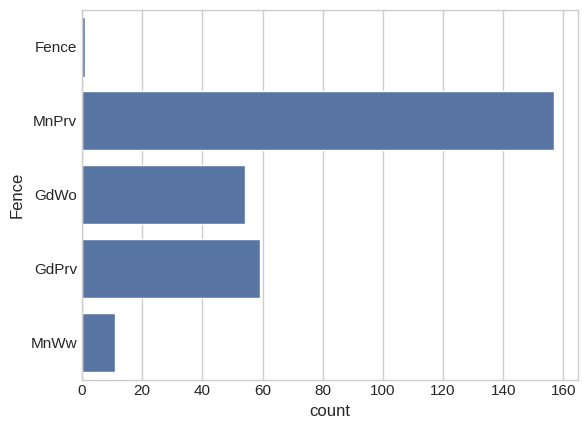

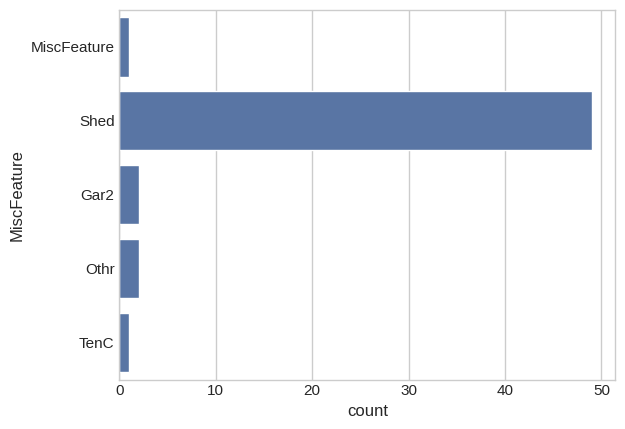

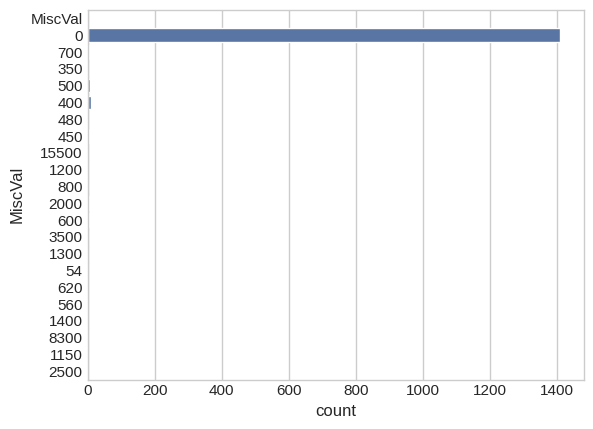

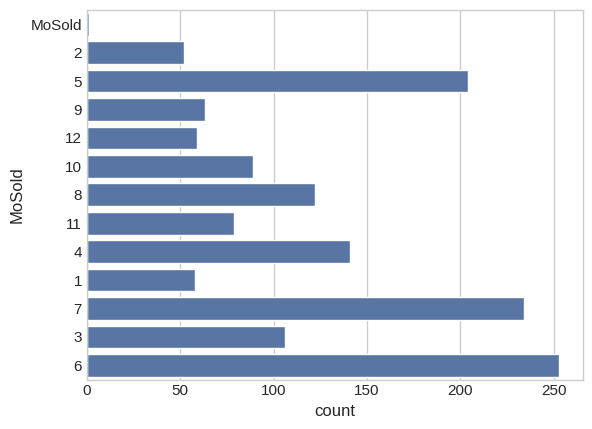

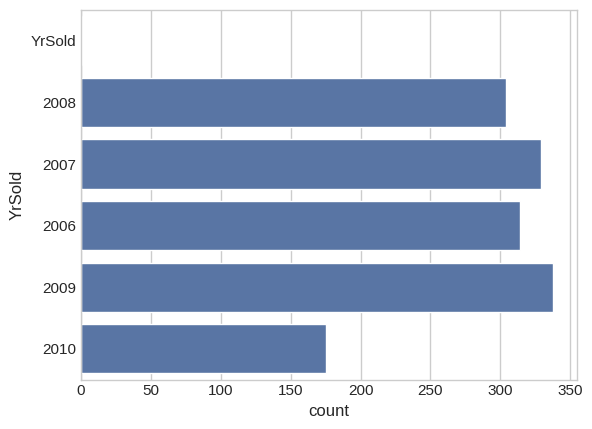

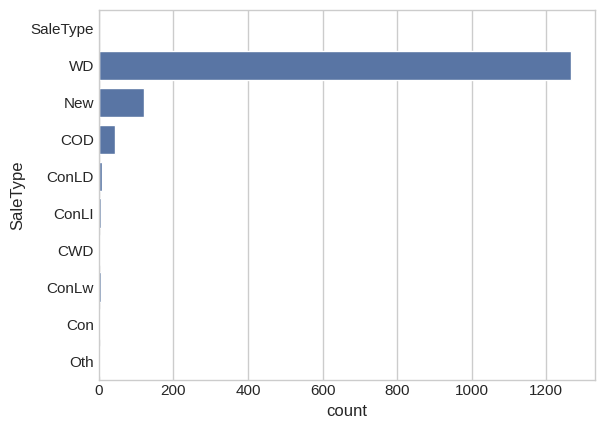

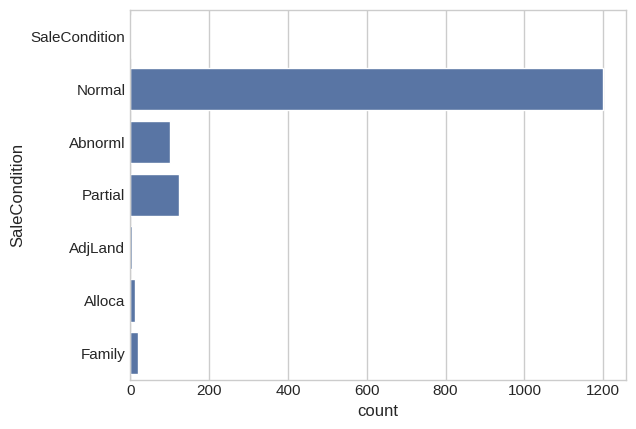

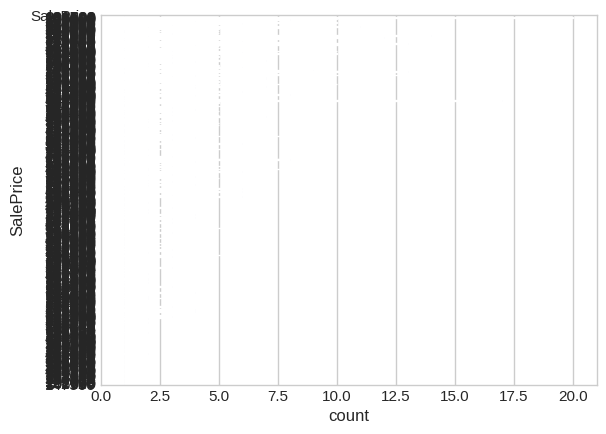

In [46]:
for i in range(1, 81):
    sns.countplot(y=df[columns[i]], data=df)
    plt.show()
